# Labolatorium 2

Celem zadania jest wykorzystanie perceptronu do klasyfikacji dwóch klas obiektów graficznych z wykorzystaniem zbioru danych MNIST (plik znajduje się w folderze Lab2 na platformie Teams). Należy skorzystać z implementacji perceptronu opracowanej podczas Lab1.

## Kroki do wykonania:

1. **Zaimportuj pliki `mnist_train.csv` oraz `mnist_test.csv` jako obiekty typu dataframe.**  
   Podziel dane na zbiory wejściowe `X` (zawierające piksele) oraz etykiety `y` (zawierające klasy), aby uzyskać zestawy `X_train`, `y_train`, `X_test` i `y_test`.  
   **Protip:** Pierwsza kolumna danych to etykiety, a pozostałe kolumny zawierają wartości pikseli.

In [2]:
import pandas as pd

train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

2. **Wybierz dwie cyfry z dostępnego zbioru danych.**  
   Przefiltruj dane, aby zbiór zawierał tylko wybrane cyfry. Zamień etykiety na potrzeby klasyfikacji binarnej: przypisz wartość `1` dla jednej i `0` dla drugiej.

In [3]:
digit_1, digit_2 = 3, 5
train_filter = (y_train == digit_1) | (y_train == digit_2)
test_filter = (y_test == digit_1) | (y_test == digit_2)

X_train = X_train[train_filter]
y_train = y_train[train_filter].apply(lambda x: 1 if x == digit_1 else 0)
X_test = X_test[test_filter]
y_test = y_test[test_filter].apply(lambda x: 1 if x == digit_1 else 0)


3. **Wyświetl kilka przykładowych obrazów cyfr.**  
   **Protip:** Możesz użyć `matplotlib.pyplot.imshow`.

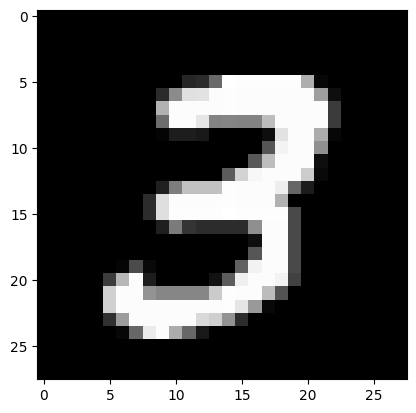

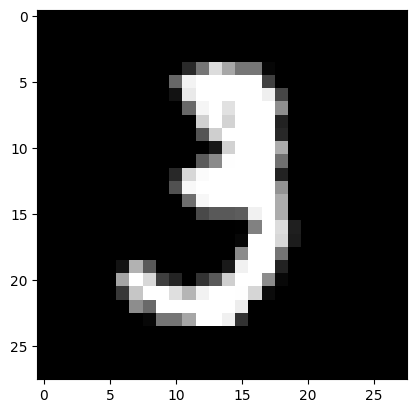

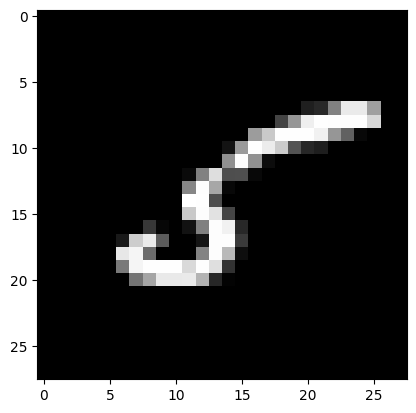

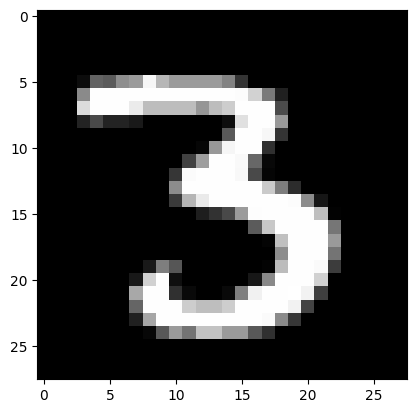

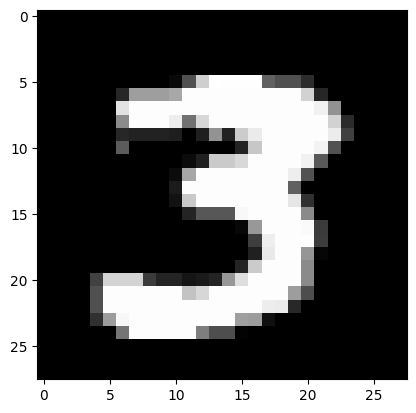

In [4]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.show()

4. **Dokonaj normalizacji danych treningowych,** tak aby wartości `X_train` i `X_test` mieściły się w przedziale `(0,1)`.  
   **Protip:** Zbiór `X` zawiera wartości pikseli w przedziale `(0, 255)`.

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

5. **Wykorzystaj klasę `Perceptron` z Laboratorium 1** i zainicjalizuj ją odpowiednim rozmiarem danych treningowych.

In [ ]:
import numpy as np

class Perceptron:
     # Inicjalizator, ustawiający atrybut self.w oraz self.b jako wektor losowych wag, n ilość sygnałów wejściowych (bias)
    def __init__(self, n, bias=True):
        self.w = np.random.rand(n)
        self.b = 1.0 if bias else 0.0

    # Metoda obliczająca odpowiedz modelu dla zadanego sygnału wejściowego x=[x1,x2,...,xN]
    def predict(self, x):
        activation = np.dot(self.w, x) + self.b
        return 1 if activation >= 0 else 0

    # Metoda uczenia według reguły perceptronu, xx - zbiór danych uczących, d - odpowiedzi,
    # eta - współczynnik uczenia,
    # tol - tolerancja (czyli jak duży błąd jesteśmy w stanie zaakceptować)
    def train(self, xx, d, eta, tol):
        t = 0
        while True:
            errors = 0
            for x, desired in zip(xx, d):
                prediction = self.predict(x)


                if prediction != desired:
                    error = desired - prediction

                    if prediction == 0 and desired == 1:
                        self.w += eta * np.array(x)
                        self.b += eta
                    elif prediction == 1 and desired == 0:
                        self.w -= eta * np.array(x)
                        self.b -= eta

                    errors += 1
            print(f"Liczba błędów: {errors}")
            if errors <= tol:
                break
            t += 1
        print(f"Algorytm zatrzymał się po {t} epokach")

    # Metoda obliczająca błąd dla danych testowych xx
    # zwraca błąd oraz wektor odpowiedzi perceptronu dla danych testowych
    def evaluate_test(self, xx, d):
        errors = 0
        predictions = []
        for x, desired in zip(xx, d):
            prediction = self.predict(x)
            predictions.append(prediction)
            errors += abs(desired - prediction)
        return errors, predictions

n_features = X_train.shape[1]
perceptron = Perceptron(n=n_features, bias=True)

6. **Zmodyfikuj metodę `train` w klasie `Perceptron`,** w taki sposób, aby zwracała lub wyświetlała wartość błędu po każdej epoce trenowania. Następnie uruchom proces trenowania z wykorzystaniem danych treningowych.

In [7]:
learning_rate = 0.1
tolerance = 400

# Train the perceptron
X_train_values = X_train.values
y_train_values = y_train.values

perceptron.train(X_train_values, y_train_values, eta=learning_rate, tol=tolerance)


Liczba błędów: 827
Liczba błędów: 628
Liczba błędów: 624
Liczba błędów: 593
Liczba błędów: 595
Liczba błędów: 586
Liczba błędów: 580
Liczba błędów: 567
Liczba błędów: 550
Liczba błędów: 563
Liczba błędów: 540
Liczba błędów: 574
Liczba błędów: 539
Liczba błędów: 547
Liczba błędów: 538
Liczba błędów: 527
Liczba błędów: 532
Liczba błędów: 496
Liczba błędów: 516
Liczba błędów: 546
Liczba błędów: 517
Liczba błędów: 511
Liczba błędów: 507
Liczba błędów: 507
Liczba błędów: 502
Liczba błędów: 497
Liczba błędów: 526
Liczba błędów: 538
Liczba błędów: 515
Liczba błędów: 508
Liczba błędów: 498
Liczba błędów: 498
Liczba błędów: 485
Liczba błędów: 493
Liczba błędów: 489
Liczba błędów: 479
Liczba błędów: 501
Liczba błędów: 505
Liczba błędów: 476
Liczba błędów: 477
Liczba błędów: 514
Liczba błędów: 481
Liczba błędów: 471
Liczba błędów: 496
Liczba błędów: 504
Liczba błędów: 499
Liczba błędów: 483
Liczba błędów: 502
Liczba błędów: 471
Liczba błędów: 473
Liczba błędów: 494
Liczba błędów: 496
Liczba błędó

7. **Za pomocą metody `evaluate_test` sprawdź, ile próbek zostało błędnie sklasyfikowanych przez model.**

In [8]:
X_test_values = X_test.values
y_test_values = y_test.values

test_errors, predictions = perceptron.evaluate_test(X_test_values, y_test_values)
print(f"Number of misclassified samples: {test_errors}")


Number of misclassified samples: 136


8. **Opracuj macierz pomyłek (confusion matrix) dla zbioru testowego.**  
   **Protip:** Wykorzystaj metodę `predict` z klasy `Perceptron` do uzyskania przewidywanych etykiet (`y_predicted`), a następnie porównaj je z rzeczywistymi wartościami `y_test` za pomocą funkcji `confusion_matrix` z biblioteki `sklearn.metrics`.

In [9]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_values, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[863  29]
 [107 903]]


9. **Oblicz następujące miary:**
   - Dokładność (accuracy),
   - Precyzję (precision),
   - Czułość (recall),
   - F1-score  
   **Protip:** Wykorzystaj metody `accuracy_score`, `precision_score`, `recall_score` oraz `f1_score` z biblioteki `sklearn.metrics`.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_values, predictions)
precision = precision_score(y_test_values, predictions)
recall = recall_score(y_test_values, predictions)
f1 = f1_score(y_test_values, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9284963196635121
Precision: 0.9688841201716738
Recall: 0.8940594059405941
F1-score: 0.9299691040164778


10. **Narysuj dowolną cyfrę w programie graficznym i przekonwertuj obraz do bitmapy o rozdzielczości 28x28 pikseli.**  
    Przekształć obraz na odpowiedni wektor, dokonaj normalizacji i przetestuj klasyfikator na tym przykładzie.  
    **Protip:** Skorzystaj z biblioteki `PIL`, aby zmienić rozmiar obrazu do 28x28 pikseli, skonwertować go do wektora. Wykorzystaj metodę `predict` z klasy `Perceptron`.

In [17]:
from PIL import Image
import numpy as np

# Konwersja do skali szarości
img = Image.open("image.bmp").convert("L")

# Zmiana rozmiaru obrazu na 28x28 pikseli
img_resized = img.resize((28, 28))

img_array = np.array(img_resized)

# Normalizacja do zakresu (0,1)
img_normalized = img_array / 255.0

img_flattened = img_normalized.reshape(1, -1)

custom_prediction = perceptron.predict(img_flattened[0])
print(f"Przewidziana klasa dla obrazu: {custom_prediction}")



Przewidziana klasa dla obrazu: 0


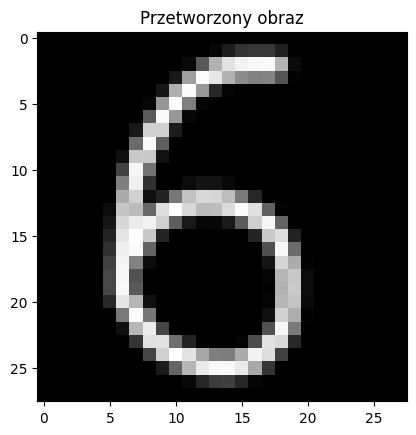

In [18]:
import matplotlib.pyplot as plt

plt.imshow(img_resized, cmap="gray")
plt.title("Przetworzony obraz")
plt.show()